## **ESPACIO VECTORIAL, SUBESPACIO VECTORIAL, INDEPENDENCIA LINEAL, BASE, DIMENCION**

| **Integrantes:**                                |
| :---                                                  |
| José Gabriel Gonzales Ramos                                             |
|Torres Vila Joel Jhonatan   |
| Asto Mondragón Irwin Rufo |

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('comprar_alquilar.csv')

In [3]:
data

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


In [4]:
data.dtypes

ingresos          int64
gastos_comunes    int64
pago_coche        int64
gastos_otros      int64
ahorros           int64
vivienda          int64
estado_civil      int64
hijos             int64
trabajo           int64
comprar           int64
dtype: object

Validar si existen datos nulos 

In [5]:
data.isnull().sum()

ingresos          0
gastos_comunes    0
pago_coche        0
gastos_otros      0
ahorros           0
vivienda          0
estado_civil      0
hijos             0
trabajo           0
comprar           0
dtype: int64

Creando variables categóricas al campo ``estado civil``, ``trabajo``, ``comprar``

In [6]:
data["estado_civil"] = pd.Categorical(data['estado_civil'], categories=[0,2,1], ordered=True)
data["trabajo"] = pd.Categorical(data['trabajo'], categories=[0, 1, 2, 3, 4, 5, 6, 7, 8], ordered=True)
data["comprar"] = pd.Categorical(data['comprar'], categories=[0, 1], ordered=True)

Validando de que las variables categóricas estén configuradas correctamente

In [7]:
data.dtypes

ingresos             int64
gastos_comunes       int64
pago_coche           int64
gastos_otros         int64
ahorros              int64
vivienda             int64
estado_civil      category
hijos                int64
trabajo           category
comprar           category
dtype: object

``gastos = gastos_comunes + gastos_otros + pago_coche``

``financiar = vivienda - ahorro``

In [8]:
data['gasto'] = data['gastos_comunes'] + data['gastos_otros'] + data['pago_coche']
data['financiar'] = data['vivienda'] - data['ahorros']

Validando de que las nuevas tablas ``gasto`` y ``financiar`` se hayan creado

In [9]:
data.dtypes

ingresos             int64
gastos_comunes       int64
pago_coche           int64
gastos_otros         int64
ahorros              int64
vivienda             int64
estado_civil      category
hijos                int64
trabajo           category
comprar           category
gasto                int64
financiar            int64
dtype: object

In [48]:
data.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gasto,financiar
0,6000,1000,0,600,50000,400000,0,2,2,1,1600,350000
1,6745,944,123,429,43240,636897,1,3,6,0,1496,593657
2,6455,1033,98,795,57463,321779,2,1,8,1,1926,264316
3,7098,1278,15,254,54506,660933,0,0,3,0,1547,606427
4,6167,863,223,520,41512,348932,0,0,3,1,1606,307420


Realice el análisis de componentes principales con las variables ‘ingresos’, ‘ahorros’, ‘vivienda’,
‘gastos’ y ‘financiar’ y utilizando el porcentaje de varianza explicada acumulada, seleccione una
cantidad de componentes que expliquen, al menos, el 90% de la variabilidad

In [11]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [56]:
data_ejercicio_b = data[['ingresos', 'ahorros', 'vivienda', 'gasto', 'financiar']]

In [57]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(data_ejercicio_b)
modelo_pca_b = pca_pipe.named_steps['pca']

In [58]:
data_ejercicio_b

,ingresos,ahorros,vivienda,gasto,financiar
0,6000,50000,400000,1600,350000
1,6745,43240,636897,1496,593657
2,6455,57463,321779,1926,264316
3,7098,54506,660933,1547,606427
4,6167,41512,348932,1606,307420
...,...,...,...,...,...
197,3831,10723,363120,1530,352397
198,3961,21880,280421,1775,258541
199,3184,35565,388025,1915,352460
200,3334,19985,376892,1888,356907


In [62]:
pd.DataFrame(data=modelo_pca_b.components_, columns=data_ejercicio_b.columns, index=['C1', 'C2', 'C3', 'C4', 'C5'])

,ingresos,ahorros,vivienda,gasto,financiar
C1,0.480968,0.454024,0.529774,1.531049e-01,0.508359
C2,-0.265673,0.068416,0.223026,-9.064812e-01,0.230843
C3,0.373021,0.653946,-0.361315,-2.708149e-01,-0.478875
C4,0.747624,-0.594056,-0.081290,-2.854996e-01,-0.006080
C5,-0.000000,-0.092917,0.729686,5.342948e-16,-0.677440


In [61]:
import matplotlib.pyplot as plt
import numpy as np


Porcentaje de varianza explicada acumulada
1 61.24%
2 82.20%
3 95.53%
4 100.00%
5 100.00%


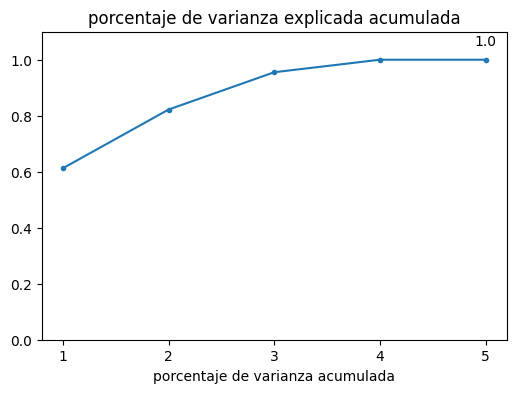

In [63]:
por_var_acum = modelo_pca_b.explained_variance_ratio_.cumsum()
print('Porcentaje de varianza explicada acumulada')
for i, j  in enumerate(por_var_acum, start=1):
    print(i, f'{j:.2%}')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
ax.plot(np.arange(len(data_ejercicio_b.columns))+1, por_var_acum, marker = '.')
for x, y in zip(np.arange(len(data_ejercicio_b.columns))+1, por_var_acum):
    label = round(y,1)
ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha ='center')

ax.set_ylim(0,1.1)
ax.set_xticks(np.arange(modelo_pca_b.n_components_)+1)
ax.set_title('porcentaje de varianza explicada acumulada')
ax.set_xlabel('componente principal')
ax.set_xlabel('porcentaje de varianza acumulada');

Según el resultado del código anterior se recomienda usar como máximo 3 variables acumuladas

In [64]:
data_ejercicio_c = data[['ingresos', 'ahorros', 'vivienda']]

In [65]:
data_ejercicio_c

,ingresos,ahorros,vivienda
0,6000,50000,400000
1,6745,43240,636897
2,6455,57463,321779
3,7098,54506,660933
4,6167,41512,348932
...,...,...,...
197,3831,10723,363120
198,3961,21880,280421
199,3184,35565,388025
200,3334,19985,376892


In [67]:
pca_pipe_c = make_pipeline(StandardScaler(), PCA())
pca_pipe_c.fit(data_ejercicio_c)
modelo_pca_c = pca_pipe_c.named_steps['pca']

pd.DataFrame(data=modelo_pca_c.components_, columns=data_ejercicio_c.columns, index=['C1', 'C2', 'C3'])

,ingresos,ahorros,vivienda
C1,0.588964,0.586498,0.556004
C2,0.365727,0.420081,-0.830527
C3,-0.720670,0.692497,0.032915


Porcentaje de varianza explicada acumulada
1 76.34%
2 90.44%
3 100.00%


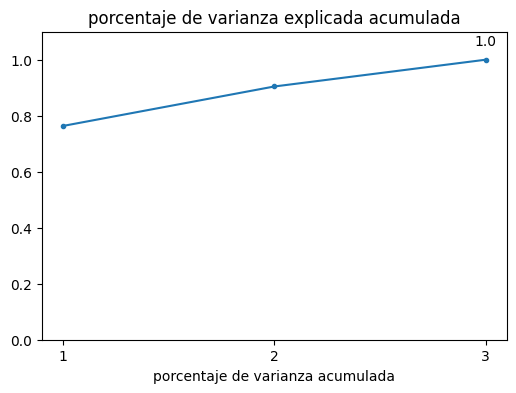

In [69]:
por_var_acum = modelo_pca_c.explained_variance_ratio_.cumsum()
print('Porcentaje de varianza explicada acumulada')
for i, j  in enumerate(por_var_acum, start=1):
    print(i, f'{j:.2%}')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
ax.plot(np.arange(len(data_ejercicio_c.columns))+1, por_var_acum, marker = '.')
for x, y in zip(np.arange(len(data_ejercicio_c.columns))+1, por_var_acum):
    label = round(y,1)
ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha ='center')

ax.set_ylim(0,1.1)
ax.set_xticks(np.arange(modelo_pca_c.n_components_)+1)
ax.set_title('porcentaje de varianza explicada acumulada')
ax.set_xlabel('componente principal')
ax.set_xlabel('porcentaje de varianza acumulada');